# E-commerce - Analise de dados 

## Cenario

In [ ]:
Uma empresa indiana de e-commerce quer fazer uma analise do seu desempenho do ano de 2018 e 2019 com o intuito de criar
um perfil de cliente mais preciso, mas para isso e preciso investi na empresa e o mesmo não tem certeza se vale a pena
realizar o investimento. Por isso que descobrir como está a saúde do negocio quando a lucro para realizar o investimento.

## Plano de analise

In [ ]:
Qual e a meta da empresa? 
3% de aumento do faturamento de um ano para o outro. 

Qual o objetivo da análise?
Descobrir a saúde monetária da empresa e responder se vale a pena investir.

De onde obterei os dados? 
Do site Kangle

link: https://www.kaggle.com/datasets/benroshan/ecommerce-data?select=List+of+Orders.csv

Quais serão as planilhas analisadas? 
 List_orders,
 Orders_details,

Quais serão as ferramentas utilizadas?
Phyton e biblioteca pandas, numpy, matplotlib e seaborn.

Qual será forma a fornece a credibilidade a qualidade dos dados?
1. Limpeza inicial dos dados.
2. Testes estatísticos referente a distribuição dos dados.

## Passo a passo da analise

In [ ]:
1.Preparação dos dados,
2.Limpeza dos dados,
3.Teste estatistico de distribuição,
4.Analise por questões,
Analise por questões:
    1.Qual o valor que representa 3% de crescimento de lucro ao ano? 
    2.Quais são os periodos mensais do ano de 2018 e 2019 que batem a meta?
    3.Qual a proporção dos top 10 clientes em relação aos demais do ano 2019? E qual impacto no lucro? 
    4.Top 7 estados que aparecem no ano de 2018 e 2019? 
    5.Como esta o lucro de produtos por categoria no ano de 2018 e 2019?   
5.Descobertas

## Preparação dos dados

In [889]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi

sns.set_style('white')

In [63]:
ft_orders = pd.read_csv(r'C:\Users\ramos\Desktop\Project Data Analyst\My Own\List of Orders.csv', 
                   sep=',', 
                   encoding='utf-8')
ft_orders.head(2)

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune


In [65]:
dim_details = pd.read_csv(r'C:\Users\ramos\Desktop\Project Data Analyst\My Own\Order Details.csv', 
                   sep=',', 
                   encoding='utf-8')
dim_details.head(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole


In [72]:
#Juntando as 2° planilhas
ord_det = pd.merge(right=ft_orders, left=dim_details, how='outer', on='Order ID' ) 

## Limpeza dos dados

In [73]:
ord_det.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7.0,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5.0,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3.0,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad


In [106]:
ord_det.tail(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
1497,B-26100,828.0,230.0,2.0,Furniture,Chairs,2019-03-31,Hitika,Madhya Pradesh,Indore
1498,B-26100,34.0,10.0,2.0,Clothing,T-shirt,2019-03-31,Hitika,Madhya Pradesh,Indore
1499,B-26100,72.0,16.0,2.0,Clothing,Shirt,2019-03-31,Hitika,Madhya Pradesh,Indore


In [71]:
ord_det.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   float64
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
 6   Order Date    1500 non-null   object 
 7   CustomerName  1500 non-null   object 
 8   State         1500 non-null   object 
 9   City          1500 non-null   object 
dtypes: float64(3), object(7)
memory usage: 134.1+ KB


In [75]:
# Verificando valores categoricos
ord_det.Category.unique()

array(['Furniture', 'Clothing', 'Electronics', nan], dtype=object)

In [79]:
# Verificando grande lista de valores tipo texto.
ord_det['Sub-Category'].unique()

array(['Bookcases', 'Stole', 'Hankerchief', 'Electronic Games', 'Phones',
       'Saree', 'Trousers', 'Chairs', 'Kurti', 'T-shirt', 'Shirt',
       'Leggings', 'Tables', 'Printers', 'Accessories', 'Furnishings',
       'Skirt', nan], dtype=object)

In [99]:
#Mudando tipo de dado
ord_det['Order Date'] = pd.to_datetime(ord_det['Order Date'])

C:\Users\ramos\AppData\Local\Temp\ipykernel_1028\200935956.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ord_det['Order Date'] = pd.to_datetime(ord_det['Order Date'])


In [91]:
ord_det.isnull().sum()

Order ID        60
Amount          60
Profit          60
Quantity        60
Category        60
Sub-Category    60
Order Date      60
CustomerName    60
State           60
City            60
Date            60
dtype: int64

In [96]:
#Removendo todos NaN
ord_det.dropna(how='all', inplace=True)

In [104]:
#Visualização df
ord_det.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7.0,Furniture,Bookcases,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5.0,Clothing,Stole,2018-01-04,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3.0,Clothing,Hankerchief,2018-01-04,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4.0,Electronics,Electronic Games,2018-01-04,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2.0,Electronics,Phones,2018-01-04,Pearl,Maharashtra,Pune


## Testes Estatistico de Distribuição

In [ ]:
Sobre o teste:
O mesmo e feito somente com as variáveis numéricas, pois busca de descobrir a normalização 
dos dados. Isso é se os dados estão distribuídos da forma que deviam. 
    
Por que e importante? 
Evita erros de compreensão tanto nas amostras como nas perguntas estatística que podem 
ser feitas posteriormente.

In [108]:
#Descobrir variaveis numericas
for col in ord_det.describe():
    print(col)

Amount
Profit
Quantity


### Coluna Amount

In [124]:
ord_det['Amount'].describe()

count    1500.000000
mean      287.668000
std       461.050488
min         4.000000
25%        45.000000
50%       118.000000
75%       322.000000
max      5729.000000
Name: Amount, dtype: float64

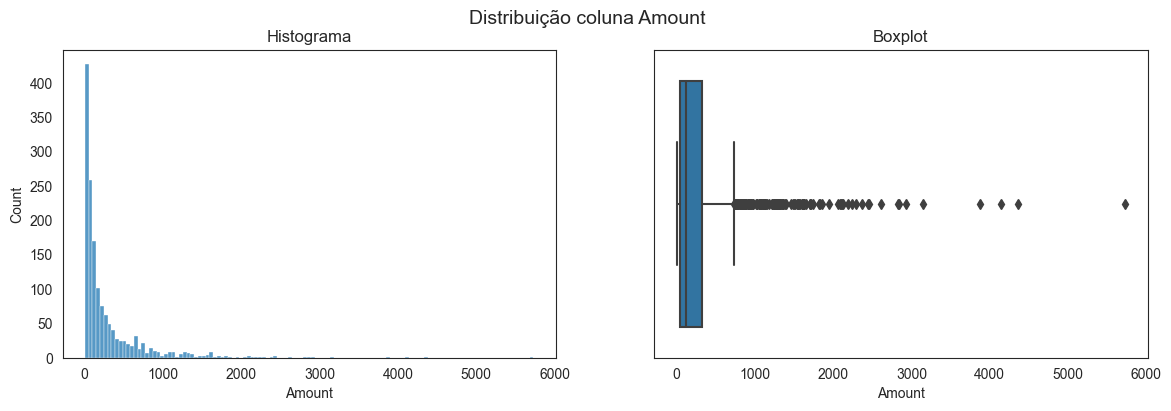

In [863]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
fig.suptitle('Distribuição coluna Amount', size=14)

sns.histplot(ax= ax[0], x='Amount', data=ord_det);
ax[0].set_title('Histograma')

sns.boxplot(ax= ax[1], x='Amount', data=ord_det);
ax[1].set_title('Boxplot');

plt.savefig('coluna_amount.png')

In [ ]:
Sobre:
    i. E visível que se tratando somente da distribuição dos dados o valor inicial de outlier e de 1000.
    ii. Temos uma concentração de valores em grupos com frequências entre 50 e 600 unidades.
    iii. Deve-se ter cautela com os valores referenciando os outliers, pois os mesmos têm pouca expressividade quando diz respeito a proporção total.

### Coluna Profit

In [132]:
ord_det['Profit'].describe()

count    1500.000000
mean       15.970000
std       169.140565
min     -1981.000000
25%        -9.250000
50%         9.000000
75%        38.000000
max      1698.000000
Name: Profit, dtype: float64

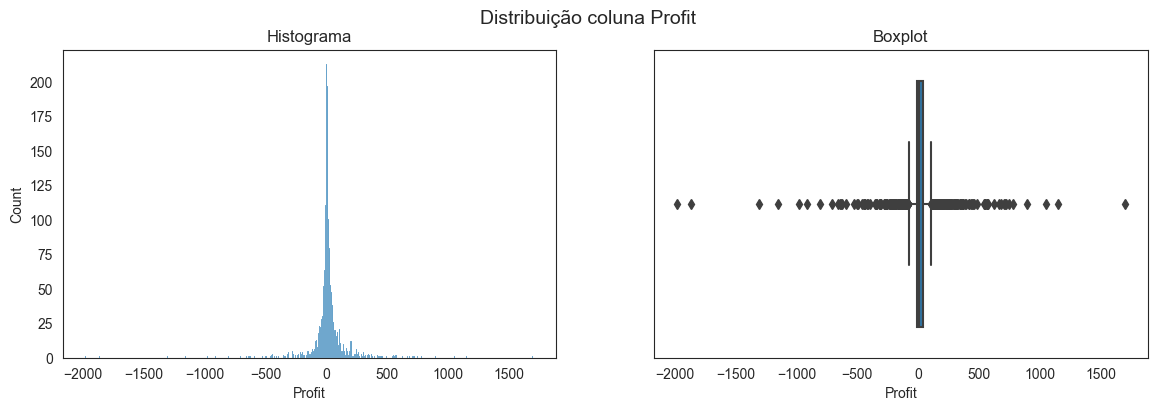

In [865]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
fig.suptitle('Distribuição coluna Profit', size=14)

sns.histplot(ax= ax[0], x='Profit', data=ord_det);
ax[0].set_title('Histograma')

sns.boxplot(ax= ax[1], x='Profit', data=ord_det);
ax[1].set_title('Boxplot');

plt.savefig('coluna_profit.png')

In [ ]:
Sobre: 
    i. O mais interessante são os valores negativos que podem indicar um problema na qualidade dos dados ou que a empresa de 
       fato passou por períodos sem lucro algum.
       
           Obs: A coluna já veio com o seu nome indicando lucro, pois isso estou considerando esse aspecto.
       
    ii. Considerando que isso pode ser um erro na qualidade dos dados, talvez uma opção seria contabilizar os dados a partir 
        de um valor mínimo negativo ou do valor zero

### Coluna Quantity

In [137]:
ord_det['Quantity'].describe()

count    1500.000000
mean        3.743333
std         2.184942
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

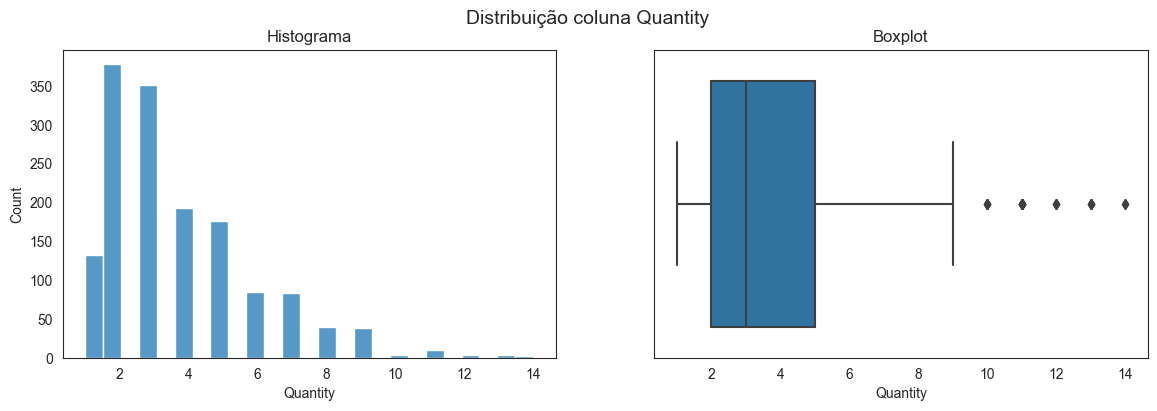

In [868]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
fig.suptitle('Distribuição coluna Quantity', size=14)

sns.histplot(ax= ax[0], x='Quantity', data=ord_det);
ax[0].set_title('Histograma')

sns.boxplot(ax= ax[1], x='Quantity', data=ord_det);
ax[1].set_title('Boxplot');

plt.savefig('coluna_quantity.png')

In [ ]:
Sobre:
    i. Esse espaçamento entre as barras no histograma indica que temos uma variação de valores fixo, isso é não tem números
       decimais, oque não e problema já que a coluna se refere a quantidade de produtos.
    ii.Podemos considerar abaixo do número 9 os outliers e por agir com cautela em decisões que levam em conta cliente 
       acima de produtos, já que temos uma pouca concentração dos mesmos. 

## Analise por questões

In [ ]:
Do que se trata? 
De questões feita em relação ao desempenho da empresa, com o objetivo de descobrir um perfil de cliente mais preciso.

### 1. Qual o valor que representa 3% de crescimento do lucro ao ano? 

In [201]:
#Criação da granularidade 
ord_det['Year'] = pd.to_datetime(ord_det['Order Date']).dt.year
ord_det['Month'] = pd.to_datetime(ord_det['Order Date']).dt.month
ord_det['Quarter'] = pd.to_datetime(ord_det['Order Date']).dt.quarter

#### Calculo para descobrir o valor dos 3% 

In [986]:
# valor 3%
tres_perc_18 = 3 * -1799 / 100
tres_perc_18 = 53.97

In [987]:
# Valor meta anual 2018 + 3%
tres_perc_18 + -1799

-1745.03

In [989]:
# Valor meta mensal 2018 + 3%
-1745.03 / 12

-145.41916666666665

In [851]:
# valor 3%
tres_perc_19 = 3 * 25754 / 100
tres_perc_19

772.62

In [264]:
# Valor meta anual 2019 + 3%
tres_perc_19 + 25754

26526.62

In [990]:
# Valor meta mensal 2018 + 3%
26526.62 / 12

2210.5516666666667

In [995]:
metrica = (
    pd.Series([-1799,25754], index=[2018,2019], name = 'lucro total'),
    pd.Series([-53,772.62], index=[2018,2019], name = 'valor 3% anual'),
    pd.Series([-1745.03,26562.62], index=[2018,2019], name = 'Meta Anual + 3%'),
    pd.Series([-145.41,2210.51], index=[2018,2019], name = 'Meta Mensal + 3%')
            )
df_metrica = pd.DataFrame(metrica).T
df_metrica

#dfi.export(df_metrica, 'df_meta.png')

,lucro total,valor 3% anual,Meta Anual + 3%,Meta Mensal + 3%
2018,-1799.0,-53.00,-1745.03,-145.41
2019,25754.0,772.62,26562.62,2210.51


In [ ]:
1.Qual o valor que representa a meta de 3% de crescimento de lucro ao ano? 
O valor que representa 3% da  meta no ano de 2018 e de R$-53.00 negativo, pois a maior parte do ano a empresa
trabalhou em dívida. E no ano de 2019 R$ 772.62 aqui o valor já e positivo, pois a empresa se recuperou.

Porque os valores da meta são tão baixos?
Essa empresa indiana e microporte que trabalha pela internet e teve um início não rentável, como será explicado
nos períodos mensais.

### 2.Quais são os periodos mensais do ano 2018 e 2019 que batem a meta?

In [906]:
# Estrutura lucro mensal 2018
ano_18 = ord_det[ord_det['Year']==2018]
ano_18 = ano_18.groupby(['Month'])['Profit'].sum().reset_index()

# Estrutura lucro mensal 2019
ano_19 = ord_det[ord_det['Year']==2019]
ano_19 = ano_19.groupby(['Month'])['Profit'].sum().reset_index()

In [902]:
#lucro mensal 2018
ano_18.head(3)

,Month,Profit
0,1,-3296.0
1,2,685.0
2,3,669.0


In [996]:
# Lucro mensal 2019
ano_19.head(3)

,Month,Profit
0,1,8655.0
1,2,2291.0
2,3,6633.0


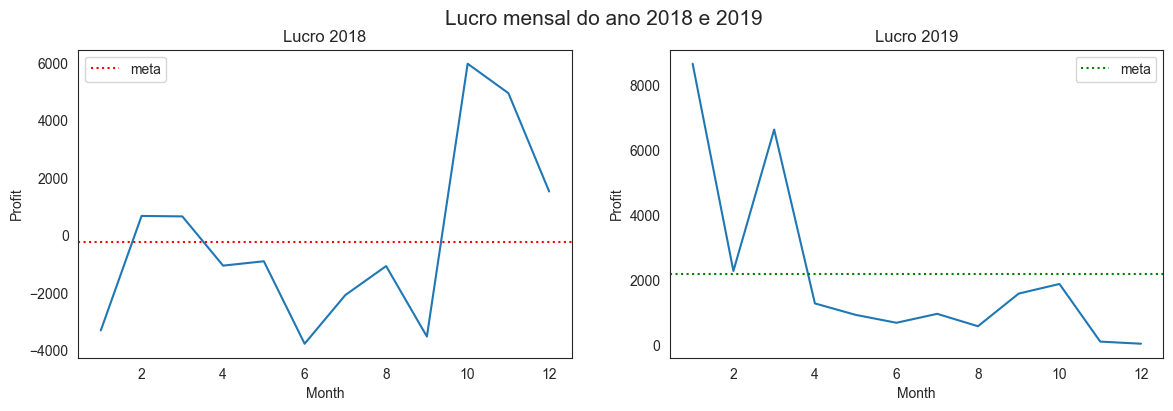

In [998]:
# Estrutra dos graficos
fig, ax = plt.subplots(1,2, figsize=(14,4))
fig.suptitle('Lucro mensal do ano 2018 e 2019', size=15)

# 2018
sns.lineplot(ax= ax[0], x='Month', y='Profit', data=ano_18);
ax[0].set_title('Lucro 2018')
ax[0].axhline(y=(-203.88), linestyle='dotted', color='red', label='meta')
ax[0].legend();

# 2019
sns.lineplot(ax= ax[1], x='Month', y='Profit', data=ano_19);
ax[1].set_title('Lucro 2019');
ax[1].axhline(y=(2210.51), linestyle='dotted', color='green', label='meta')
ax[1].legend();

plt.savefig('lucro mensal 2018 e 2019.png')

In [ ]:
Quais são os períodos mensais do ano 2018 e 2019 bateram a meta?
No ano de 2018  temos 84%  dos meses negativos ou abaixo de um valor ideal para ser considerado lucro, diante 
disso os meses que foi obtido um valor ideal ou bateu a meta e outubro, novembro e dezembro. Já no ano de 2019
temos 76% dos meses abaixo da meta, mas apesar disso estão com valores positivos diferente do ano anterior.

### 3.Qual a proporção dos top 10 clientes em relação os demais? E qual impacto no lucro? 

In [515]:
cliente_19 = ord_det[ord_det['Year'] == 2019]
cliente_19 = cliente_19.groupby(['CustomerName'])['Profit'].sum().sort_values(ascending=False).reset_index()

In [517]:
# Criando condição p/ variavel categorica
cliente_19['Category'] = np.array(np.where(cliente_19['Profit'] >= 660, 'top 10','top 11 a 136'))

# Mudando tipo de daddo
cliente_19['Profit_int'] = cliente_19['Profit'].astype(int)

In [519]:
cliente_19.head(11)

,CustomerName,Profit,Category,Profit_int
0,Seema,1970.0,top 10,1970
1,Sarita,1219.0,top 10,1219
2,Parishi,906.0,top 10,906
3,Bhishm,903.0,top 10,903
4,Soumya,903.0,top 10,903
5,Pournamasi,889.0,top 10,889
6,Harshal,864.0,top 10,864
7,Yaanvi,683.0,top 10,683
8,Manju,672.0,top 10,672
9,Oshin,660.0,top 10,660


In [520]:
# Agrupando valor pela variavel categorica.
tab_cliente_19 = cliente_19.groupby(['Category'])['Profit_int'].sum().reset_index()
tab_cliente_19

,Category,Profit_int
0,top 10,9669
1,top 11 a 136,16085


#### Calculo para descobrir o percentual dos top 10 cliente:

In [464]:
#top 10 clientes
cliente_19.head(10).sum()

CustomerName    SeemaSaritaParishiBhishmSoumyaPournamasiHarsha...
Profit                                                     9669.0
dtype: object

In [506]:
#Top 11 a 136 clientes
cliente_19.loc[10:136,['CustomerName','Profit']].sum()

CustomerName    PinkyMuskanMukeshShrutiArpitaJesalSudhirParthK...
Profit                                                    16085.0
dtype: object

In [465]:
#total
cliente_19.sum()

CustomerName    SeemaSaritaParishiBhishmSoumyaPournamasiHarsha...
Profit                                                    25754.0
dtype: object

In [508]:
prim_7 = 9669  
prim_8a31 = 16085 
total = 25754

In [497]:
#Valor percentual do top 10 em relação ao restante
prim_7/total*100

37.54368253475188

In [509]:
prim_8a31/total*100

62.45631746524811

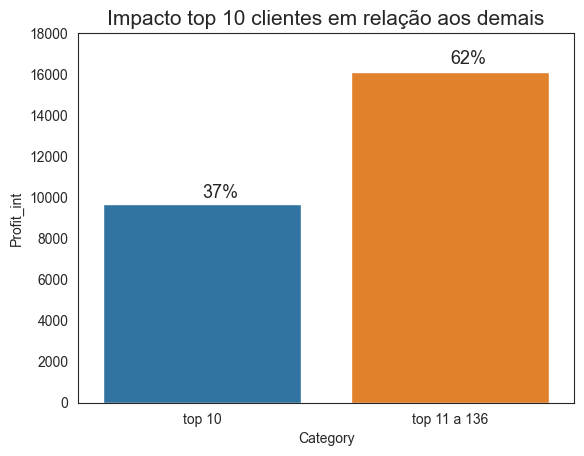

In [871]:
# Grafico top 10
ax = sns.barplot(x='Category', y='Profit_int', data=tab_cliente_19, errorbar=None)
ax.set_title('Impacto top 10 clientes em relação aos demais', size=15);
ax.text(0,10000, '37%', size=13)
ax.text(1,16500, '62%', size=13)
ax.set_ylim(0,18000);

plt.savefig('impacto top 10 cliante em relação aos demais')

In [ ]:
Qual a proporção dos top 10 clientes em relação os demais? E qual impacto no lucro?
Esse pequeno grupo de 10 clientes tem um impacto financeiro referente a 37% de todo o lucro. E os 126 clientes restantes dividem os 62% do lucro obtido pela empresa.
    
Vale apena criar uma partição só para esse pequeno grupo? 
Sim, pois tem um grande impacto no lucro. E não, pois e menos de 10% do número total de cliente e vai exigir uma maior complexidade.

### 4.Top 7 estados que aparecem em 2018 e 2019? 

In [908]:
# Planilha só com variaveis que vou usar
state_year = ord_det[['State','Profit','Year']]
state_year.head(3)

,State,Profit,Year
0,Gujarat,-1148.0,2018
1,Gujarat,-12.0,2018
2,Gujarat,-2.0,2018


In [622]:
#Filtrei por cada ano
state_year_19 = state_year[state_year['Year']==2019]

state_year_18 = state_year[state_year['Year']==2018]

In [939]:
# Agrupei por estado que mais lucro em 2019
top_19_state_year = (
                    state_year_19.groupby(['State'])['Profit']
                    .sum()
                    .sort_values(ascending=False)
                    .reset_index()
                    .head(7)
                    )
top_19_state_year.head(7)

,State,Profit
0,Madhya Pradesh,5528.0
1,Maharashtra,3880.0
2,Delhi,2881.0
3,Uttar Pradesh,2329.0
4,West Bengal,2129.0
5,Rajasthan,1608.0
6,Jammu and Kashmir,1207.0


In [938]:
# Agrupei por estado que mais lucro em 2018
top_18_state_year = (
                    state_year_18.groupby(['State'])['Profit']
                    .sum()
                    .sort_values(ascending=False)
                    .reset_index()
                    .head(7)
                    )
top_18_state_year.head(7)

,State,Profit
0,Maharashtra,2296.0
1,Kerala,1112.0
2,Uttar Pradesh,908.0
3,Himachal Pradesh,478.0
4,Haryana,385.0
5,West Bengal,371.0
6,Goa,292.0


#### Calculo para descobrir meta 3% dos top 7 estados

In [934]:
top_19_state_year['Profit'].head(7).sum()

19562.0

In [935]:
3 * 19562/ 100

586.86

In [932]:
top_18_state_year['Profit'].head(7).sum()

5842.0

In [933]:
3 * 5842 / 100

175.26

In [ ]:
Meta por estado:
O valor percentual referente a 3% de crescimento dos top 7 estados no ano de 2018 e de R$ 175.26 e no ano de 2019 R$ 586,86.

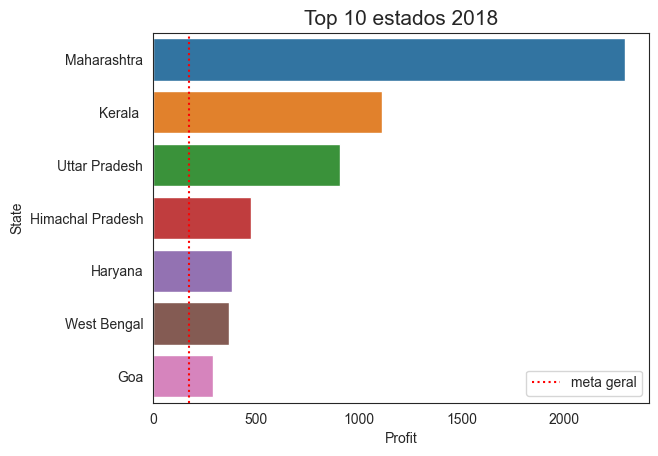

In [978]:
# Grafico ano 2018
ax = sns.barplot(y='State', x='Profit', data= top_18_state_year);
ax.set_title('Top 10 estados 2018', size=15)
ax.axvline(x=(175), 
           linestyle='dotted', 
           color='red', 
           label='meta geral')
ax.legend(loc='lower right');

plt.savefig('Top 7 estados 2018.png')

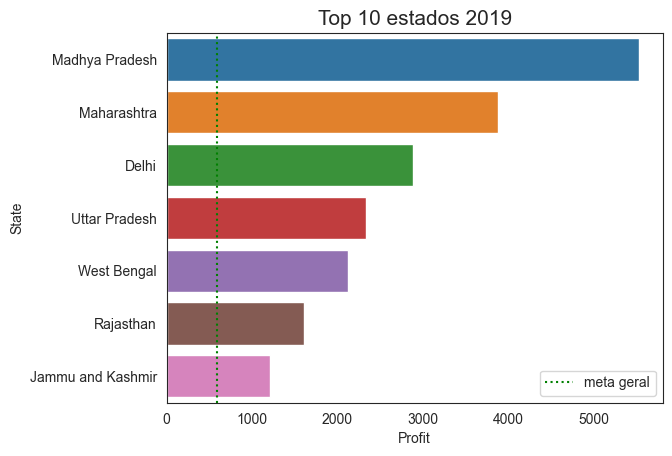

In [979]:
# Grafico ano 2019
ax = sns.barplot(y='State', x='Profit', data= top_19_state_year);
ax.set_title('Top 10 estados 2019', size=15);
ax.axvline(x=(586), 
           linestyle='dotted', 
           color='green', 
           label='meta geral')
ax.legend()

plt.savefig('Top 7 estados 2019.png');

In [ ]:
Top 7 estados quem aparecem em 2018 e 2019? 
Somente 3 estados reaparecem no ano de 2019, mas todos eles forneceram um lucro muito maior. Além de estarem
melhores posicionadas do que no ano anterior. 

Estados: Maharashtra, Uttar Pradeshe e West Bengal.

Porque temos estados com lucro positivo no ano de 2018?
Pois, mesmo tendo o lucro total negativo ainda tivemos 36% do total de estados que obtiveram um valor acima 
de 300 ou positivo. O que se consideramos somente os top 7 conseguimos um valor positivo.

### 5.Como esta o Lucro de produtos por categoria no ano de 2018 e 2019?   

In [809]:
#Planilha com variavel que usarei 
cat_year = ord_det[['Year', 'Category','Profit']]
cat_year.head()

,Year,Category,Profit
0,2018,Furniture,-1148.0
1,2018,Clothing,-12.0
2,2018,Clothing,-2.0
3,2018,Electronics,-56.0
4,2018,Electronics,-111.0


In [970]:
#Filtrando a planilha por cada ano individualmente
cat_year_19 = cat_year[cat_year['Year'] == 2019]

cat_year_18 = cat_year[cat_year['Year'] == 2018]

In [814]:
# Lucro por categoria 2018
d_cat_year_18 = (cat_year_18.
                 groupby(['Category'])['Profit']
                 .sum()
                 .sort_values(ascending=False)
                 .reset_index()
                 .head(5)
                )
d_cat_year_18

,Category,Profit
0,Clothing,2590.0
1,Electronics,352.0
2,Furniture,-4741.0


In [971]:
# Lucro por categoria 2019
d_cat_year_19 = (cat_year_19.
                 groupby(['Category'])['Profit']
                 .sum()
                 .sort_values(ascending=False)
                 .reset_index()
                 .head(5)
                )
d_cat_year_19

,Category,Profit
0,Electronics,10142.0
1,Clothing,8573.0
2,Furniture,7039.0


#### Calculo para descobrir meta 3% dos produtos 

In [838]:
d_cat_year_19['Profit'].sum()

25754.0

In [839]:
# valor total didivo por categoria
25754.0 / 3

8584.666666666666

In [974]:
# 3% de meta por categoria
3 * 8584 / 100

257.52

In [ ]:
# meta por categoria + 3%
8.841

In [842]:
d_cat_year_18['Profit'].sum()

-1799.0

In [ ]:
# valor total didivo por categoria
-1799 / 3

-599.6666666666666

In [ ]:
# valor total didivo por categoria
3 * -599 / 100

-17.97

In [ ]:
# meta por categoria + 3%
-581

In [ ]:
Meta por estado:
O valor percentual referente a 3% de crescimento por produto e de R$-518,00 no ano 2018 e de R$ 8841,62 no ano de 2019.

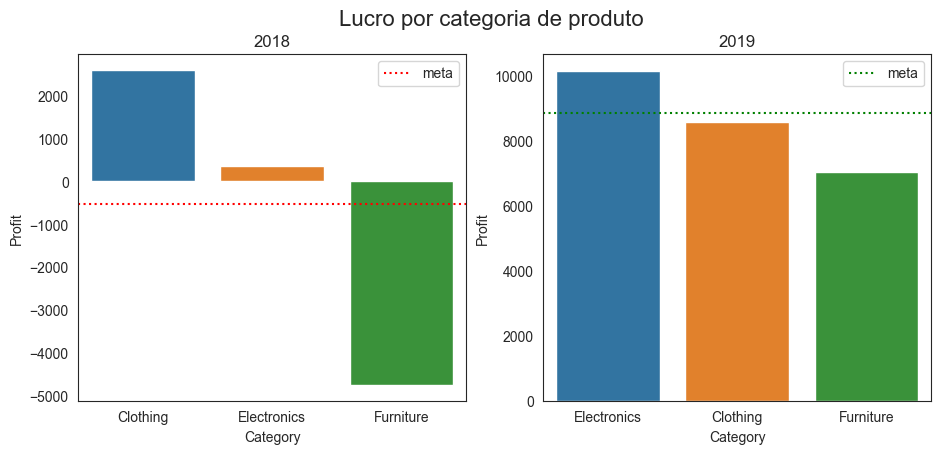

In [1001]:
# Grafico 
fig, ax = plt.subplots(1,2, figsize=(11,4.5))
fig.suptitle('Lucro por categoria de produto', size=16)

# 2019
sns.barplot(ax = ax[1],x='Category', y='Profit', data=d_cat_year_19)
ax[1].set_title('2019', size=12)
ax[1].axhline(y=(8841), linestyle='dotted', color='green', label='meta')
ax[1].legend();

# 2018
sns.barplot(ax = ax[0], x='Category', y='Profit', data=d_cat_year_18)
ax[0].set_title('2018', size=12)
ax[0].axhline(y=(-518.00), linestyle='dotted', color='red', label='meta')
ax[0].legend();

#plt.savefig('lucro por categoria.png')

In [ ]:
Como esta o Lucro de produtos por categoria no ano de 2018 e 2019?
No ano 2018 a categoria Clothing e Eletronics ambas conseguem bate a meta, mas o impacto negativo 
da categoria furniture foi tão grande que suprimiu os valores positivos. Ocasionando em uma 
meta minima mas negativa e grande ano de perda. 

Já no ano de 2019 todas as categorias tiveram valores positivos muito expressivos (6x maior), oque
gerando uma meta muito acima do previsa e ainda assim a batendo.

# Descobertas

In [ ]:
1. Quanto a lucro o ano 2018 o resultado foi péssimo. A ponto do lucro total ser negativo, 
   mas em 2019 tivemos uma grande recuperação.
    
2. Quanto aos produtos a maior parte da concentração do lucro advêm que poucos produtos vendidos para muitos 
   clientes (especificamente menos de 9 produtos por cliente).
    
3. Quanto a distribuição de lucro mensal temos um grande crescimento exponencial no mês 9 de 2018 até o mês 4 de 2019.

4. Quanto à proporção de clientes em relação ao lucro foi concluído que os top10 clientes 
   representam 40% de lucro juntando o ano de 2018 e 2019.
    
5. Quanto a distribuição de lucro por estado, apesar do lucro total negativo em 2018 temos mais de 36% do 
   número de estados com lucro positivo ou acima de R$300,00.

# Sugestão

In [ ]:
Esperar obter uma consistência de lucro mensal e de produtos no próximo ano de pelo menos 6 meses, principalmente
os produtos de categoria furnitere.

Mas caso queira realiza o investimento já, recomendo realiza outra análise de produtos específicos da categoria 
funiture já que teve um grande impacto no lucro e um acompanhamento de lucro trimestral, se possível tente realiza uma
previsão de lucro. 